In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *

#import numpy . plot . image . math

In [2]:
"""to do: FRAME
- Create Frame of individual line
- append all the Frame of individual line
"""
angle = 5
width = 640
height = 480

def lineC(width,height,angle):
    i=1
    fline = {}
    #fline= np.empty([320,0,2])
    while angle*i < 90:
        theta = angle *i
        tan = math.tan(math.radians(theta))
        lr = np.empty([int(width/2),2],int)
        ll = np.empty([int(width/2),2],int)
        lr[0] = np.array([[int(width/2)-1,height-1]])
        ll[0] = np.array([[int(width/2)-1,height-1]])
        for iter in range(1,int(width/2)):
            for jter in range(0,height):
                test = abs(tan-jter/iter)
                if test<=0.01:
                    #print(str(iter) +' '+ str(480-jter+1))
                    lr[iter] = np.array([int((width)/2+iter-1),(height)-jter-1+1])
                    ll[iter] = np.array([int((width)/2-iter-1),(height)-jter-1+1])
                    break
                else:
                    #if not jter==height-1: continue
                    lr[iter] = np.array([int((width)/2+iter-1),lr[iter-1,1]])
                    ll[iter] = np.array([int((width)/2-iter-1),ll[iter-1,1]])
        #print(lr.shape)
        #fline = np.append(fline,[lr],axis=1)

        fline[str(2*i-1)] = lr
        fline[str(2*i)] = ll
        i = i+1
    return fline

fline = lineC(width,height,angle) 
#print("right line :"+str(len(fline.keys()))+', The size of frame: '+str(np.mean([len(fline[key]) for key in fline.keys()])))
#print("left line :"+str(len(flr.keys()))+', The size of frame: '+str(np.mean([len(flr[key]) for key in flr.keys()])))
#flr['1'].shape

In [29]:
"""to do: Get Data
- import the image
- get the data from each line
- append each line in on numpy array [row = 320 , col = line]
"""
imagePath = 'image/img25.jpg'
img = np.array(Image.open(imagePath))
def selectData(img,fline):
    data = np.empty([len(fline['1']),0],int)
    for key in fline.keys():
        data = np.append(data,np.array([[img[y,x,2]] for x,y in fline[key]]),axis=1)
    return data

data = selectData(img,fline)


In [5]:
#(3*np.std(data[0:50,:],axis=0)).shape
a = 0
b = 50

BND = np.zeros([34])
segCal = data[0:50,:]
#print(segCal[:,0])
plusCheck = np.mean(segCal,axis=0) + 3* np.std(segCal,axis=0)
minusCheck = np.mean(segCal,axis=0) - 3* np.std(segCal,axis=0)
test = data[49:60,:]
#print(plusCheck[0],'\n',np.mean(segCal,axis=0)[0],'\n ', minusCheck[0],'\n',test[1,0])
checktop = (test > plusCheck)+(test<minusCheck)
#pos = np.empty([11,0])
index = np.argmax(checktop,axis=0)
tempBND = np.where(index==0,index,index+49)
BND = np.where(BND==0,tempBND,BND)
#for n in data[0,:]:
#    pos = np.append(pos,np.arange(49,60).reshape([11,1]),axis=1)

print(BND)

[ 0. 57.  0.  0.  0. 55.  0. 51.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. 59.  0.  0.  0.  0. 56.  0.  0. 51. 59.  0.  0.]


In [33]:
"""to do: 3-sigma
- calculate s1 and hd position
- calculating the mean and thrid standard
- comparing operation of the thrid standard and hd data
- posistion the error
- appending the posistion and get corrdinate 
"""
def findEdges(data,s1,hd,h1):
    BND = np.zeros(data.shape[1])
    a = 0
    b = s1
    while True:
        segCal = data[a:b,:]
        plusCheck = np.mean(segCal,axis=0) + 3* np.std(segCal,axis=0)
        minusCheck = np.mean(segCal,axis=0) - 3* np.std(segCal,axis=0)
        if(b+hd) > len(data): hd = len(data)-b
        test = data[b-1:b+hd,:]
        checktop = (test > plusCheck)+(test<minusCheck)
        index = np.min(checktop,axis=0)
        tempBND = np.where(index==0,index,index+(b-2))
        BND = np.where(BND==0,tempBND,BND)
        a= a+h1
        b= b+h1
        if b >len(data): break 
    return BND



BND = findEdges(data,50,5,2)
print(BND)
    


[281. 251. 269. 241. 257. 233. 243. 225. 227. 211. 209. 197. 185. 177.
 153. 151. 151. 147.]


In [7]:
len(data)

320

281


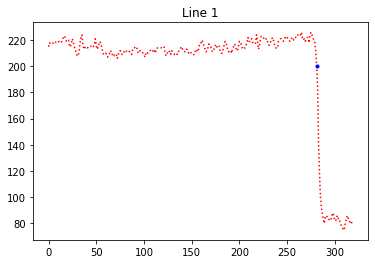

251


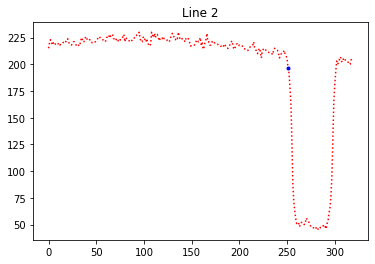

269


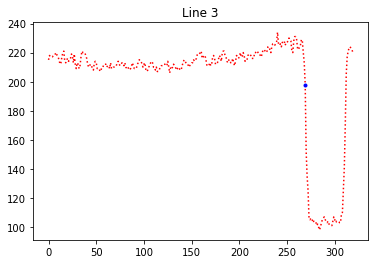

241


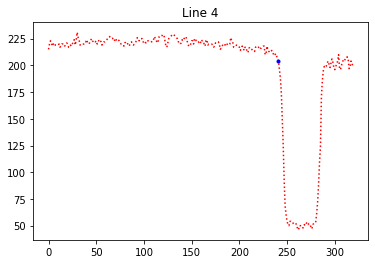

257


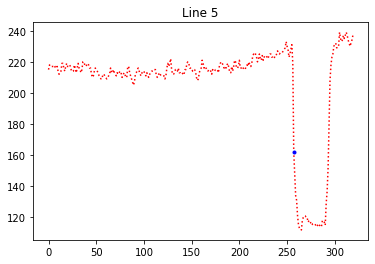

233


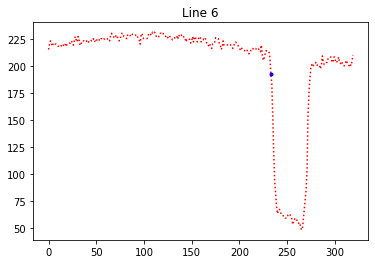

243


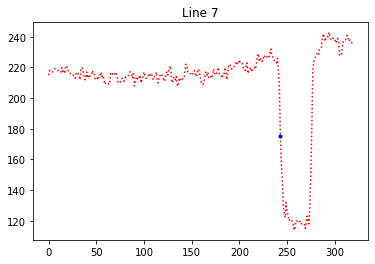

225


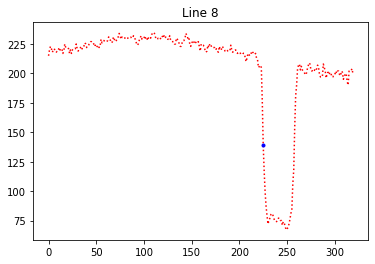

227


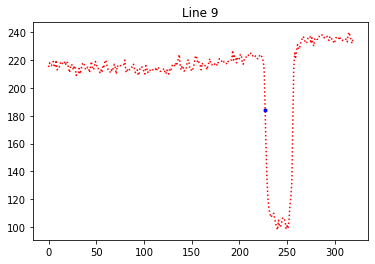

211


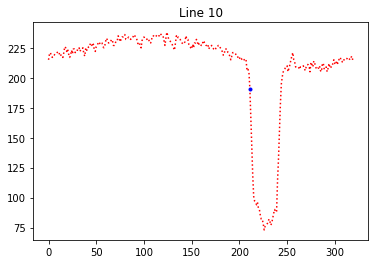

209


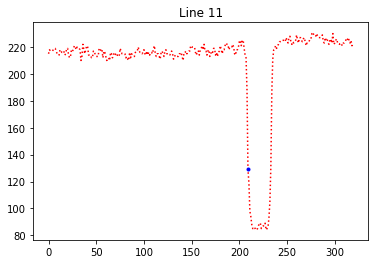

197


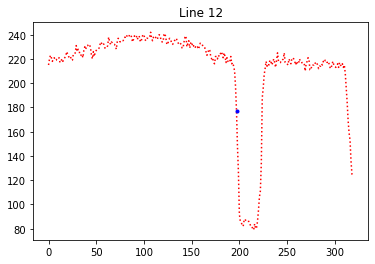

185


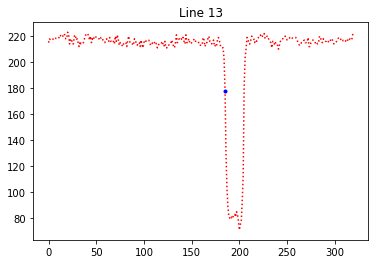

177


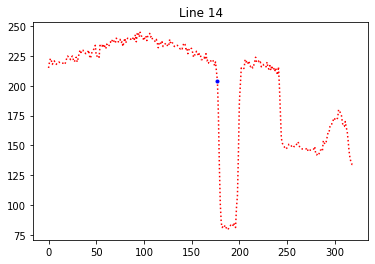

153


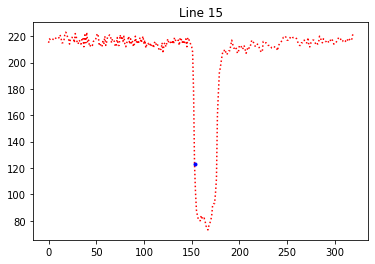

151


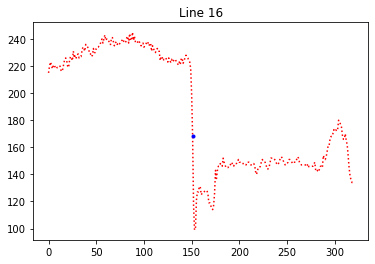

151


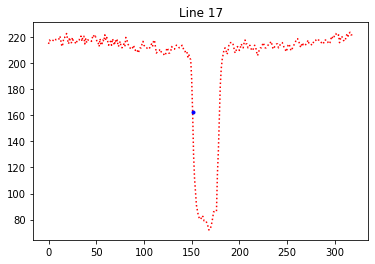

147


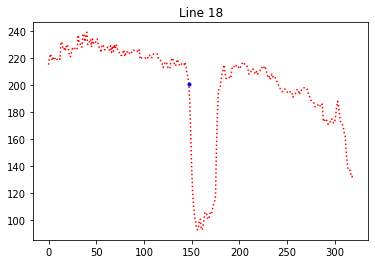

In [34]:
""" To do : plot the data
"""
for num in range(0,data.shape[1]):
    plt.plot([datas for datas in data[:,num]],'r:')
    plt.plot(int(BND[num]),data[int(BND[num]),num],'b.')
    plt.title(('Line '+str(num+1)))
    print(int(BND[num]))
    plt.show()

[215 218 217 217 217 218 218 219 220 218 217 215 212 213 217 220 221 214
 213 215 216 214 215 216 219 218 213 219 212 209 213 212 209 211 217 221
 220 220 220 218 216 212 210 211 212 211 209 208 213 214 213 209 209 209
 207 208 210 210 212 212 212 210 211 211 209 213 209 209 210 210 210 211
 213 214 212 211 212 213 212 211 213 210 209 210 209 208 209 211 213 210
 209 209 209 212 213 215 215 214 212 210 212 213 208 207 208 210 211 213
 214 213 210 210 208 210 207 207 208 210 211 211 211 212 212 211 211 214
 210 206 210 209 210 212 211 210 208 209 210 209 208 208 211 213 215 214
 213 212 212 210 211 212 213 213 215 214 215 216 219 219 219 220 221 216
 217 218 218 215 211 211 211 213 211 212 217 218 216 212 212 213 215 218
 217 214 219 221 221 218 217 214 213 215 215 213 213 216 213 211 214 218
 217 216 217 220 217 217 220 218 214 215 215 218 219 219 218 216 216 216
 220 220 221 221 219 219 218 217 220 222 222 221 220 221 224 224 222 220
 224 226 226 225 226 227 234 226 225 226 224 227 22

ValueError: x and y must have same first dimension, but have shapes (1,) and (0, 320)

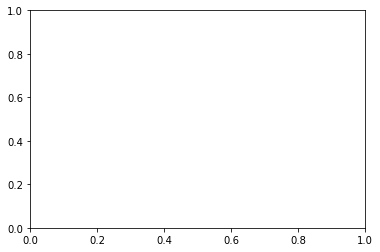

In [47]:
s1 = 50 
h1 = 5
hd = 2
a = 0
b = s1
data1 = data[:,2]
print(data1)
while True:
    segCal = data1[a:b]
    plusCheck = np.mean(segCal) + 3* np.std(segCal)
    minusCheck = np.mean(segCal) - 3* np.std(segCal)
    if(b+hd) > len(data1): hd = len(data1)-b
    test = data1[b-1:b+hd]
    checktop = (test > plusCheck)+(test<minusCheck)
    index = np.min(checktop)
    tempBND = np.where(index==0,index,index+(b-2))
    print(tempBND)
    a= a+h1
    b= b+h1
    if b >len(data1): break 
    plt.plot(index,data1[index])
    

In [21]:
"""to do: ploting 
- plot image
- plot lines
- plot error posistion
- plot center
"""
print(BND.shape)
print(len(fline.keys()))
def plotData(img,fline,BND):
    for key in fline.keys():
        imshow(img)
        plt.plot(fline[key][:,0],fline[key][:,1],'k:')
        plt.plot(fline[key][int(BND[int(key)-1]),0],fline[key][int(BND[int(key)-1]),1],'ro')
    plt.show()





(18,)
34


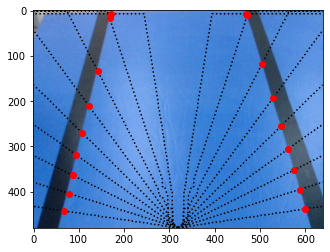

In [32]:
line = lineC(width,height,9)
img = np.array(Image.open('image/img25.jpg'))
data = selectData(img,line)
edge = findEdges(data,50,5,2)
plotData(img,line,edge)

In [25]:
from ImageFrame import Frame
from EdgeFinderV2 import EdgeFinder
from PIL import Image

img = Image.open('image/img21.jpg')

In [26]:
frame1 = Frame(640,480,10)
data = frame1.get_data(img,2)
edge = EdgeFinder(70,3,10,data)

load CVS file successfully
Calculating Frame ...
angle = 10, width=640, height240
angle = 20, width=640, height240
angle = 30, width=640, height240
angle = 40, width=640, height240
angle = 50, width=640, height240
angle = 60, width=640, height240
angle = 70, width=640, height240
angle = 80, width=640, height240
Done!
